### 用于筛选数据，比如只取B.png或者G.png,用于训练，也有取最大联通域

In [7]:
# 筛选需要的数据
import os
import glob
import shutil

folder_path = '/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all'
json_files = glob.glob(os.path.join(folder_path, '*.json'))

os.makedirs("image#20231106", exist_ok=True)
os.makedirs("json#20231106", exist_ok=True)

for json_path in json_files:
    print(json_path)
    img_path = json_path.replace(".json", ".png")
    shutil.copy(img_path, "image#20231106")
    shutil.copy(json_path, "json#20231106")


/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/B6-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/D5-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/C4-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/B8-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/B10-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/D3-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/D10-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/E3-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/D4-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/D8-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/E4-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/B9-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/E8-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/B5-B.json
/Users/skyous/Desktop/Li_teacher#20231105/1103-D5-1-all/D6-B.json
/Users/s

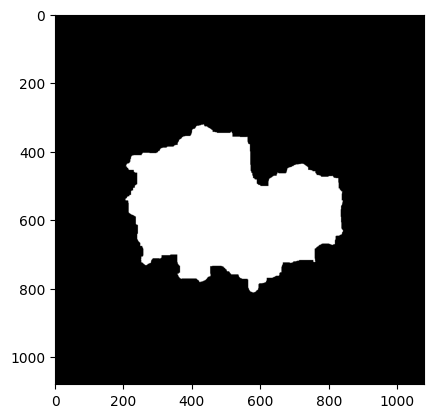

1 0


In [1]:
# 显示
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('20231107#ALL_binary/1030-D0-1-all-binary/B5-G.png', 0)

# 使用matplotlib显示图像
plt.imshow(image, cmap='gray')  # cmap参数用于指定灰度图像的颜色映射，默认为'viridis'
plt.axis('on')  # 关闭坐标轴
plt.show()
print(image.max(), image.min())
# image

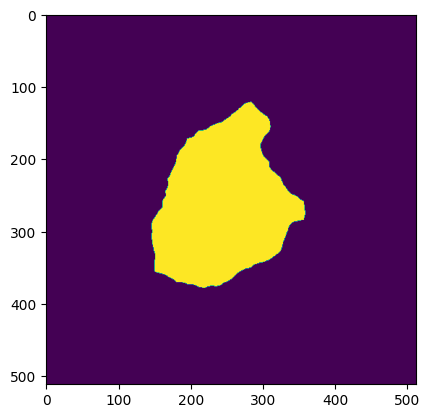

In [33]:
from skimage.measure import label
import numpy as np
def get_largest_aero(input_mask):
    """
        对淹没取最大联通域
    """
    labeled_mask = label(input_mask)
    unique_labels, label_counts = np.unique(labeled_mask, return_counts=True)
    largest_label = unique_labels[np.argmax(label_counts[1:]) + 1]  # 忽略背景标签(0)

    largest_component_array = np.zeros_like(labeled_mask, dtype=np.uint8)
    largest_component_array[labeled_mask == largest_label] = 1

    return largest_component_array
   
plt.imshow(get_largest_aero(image), cmap='viridis')  # cmap参数用于指定灰度图像的颜色映射，默认为'viridis'
plt.axis('on')  # 关闭坐标轴
plt.show()

In [38]:
# 批量取最大联通域
import os
import glob
import shutil

folder_path = 'predict/1103-D5-2-single_B_512/pseudo_color_prediction'
target_path = 'predict/1103-D5-2-single_B_512_mask_largest'
img_files = glob.glob(os.path.join(folder_path, '*.png'))

os.makedirs(target_path, exist_ok=True)

for img_path in img_files:
    
    print(img_path)
    image = cv2.imread(img_path, 0)
    largest_mask = get_largest_aero(image)

    mask_path = os.path.join(target_path, img_path.split("/")[-1])
    
    cv2.imwrite(mask_path, largest_mask)


predict/1103-D5-2-single_B_512/pseudo_color_prediction/B8-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/G4-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/G10-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/D11-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/D9-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/G6-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/C3-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/E2-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/E6-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/G2-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/C7-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/C5-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/F9-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/F10-B.png
predict/1103-D5-2-single_B_512/pseudo_color_prediction/E11-B.png
predict/1103-D5-2-single_B_512/pseud

In [10]:
import os
import shutil

# 源文件夹路径
source_folder = '/Users/skyous/Desktop/Li_teacher#20231105/1030/20231106_2045#dataset/image#20231106_512#2'
# 目标文件夹路径
target_folder = '/Users/skyous/Desktop/Li_teacher#20231105/1030/20231106_2045#dataset/image#20231106_512'

# 遍历源文件夹中的所有png文件
for filename in os.listdir(source_folder):
    if filename.endswith('.png'):
        # 构造新的文件名
        new_filename = filename.replace('.png', '2.png')
        # 构造源文件的完整路径
        source_file = os.path.join(source_folder, filename)
        # 构造目标文件的完整路径
        target_file = os.path.join(target_folder, new_filename)
        # 重命名文件
        shutil.copyfile(source_file, target_file)


In [42]:
# 筛选需要的数据
import os
import glob
import shutil

folder_path = '20231103-ZYL-ALL/1103-D5-2-single'
target_path = 'green_img/1103-D5-2-single'
img_files = glob.glob(os.path.join(folder_path, '*G.png'))

os.makedirs(target_path, exist_ok=True)

for img_path in img_files:
    print(img_path)
    shutil.copy(img_path, target_path)


20231103-ZYL-ALL/1103-D5-2-single/C5-G.png
20231103-ZYL-ALL/1103-D5-2-single/F9-G.png
20231103-ZYL-ALL/1103-D5-2-single/F10-G.png
20231103-ZYL-ALL/1103-D5-2-single/E11-G.png
20231103-ZYL-ALL/1103-D5-2-single/E4-G.png
20231103-ZYL-ALL/1103-D5-2-single/E6-G.png
20231103-ZYL-ALL/1103-D5-2-single/C7-G.png
20231103-ZYL-ALL/1103-D5-2-single/G2-G.png
20231103-ZYL-ALL/1103-D5-2-single/C3-G.png
20231103-ZYL-ALL/1103-D5-2-single/G6-G.png
20231103-ZYL-ALL/1103-D5-2-single/E2-G.png
20231103-ZYL-ALL/1103-D5-2-single/B8-G.png
20231103-ZYL-ALL/1103-D5-2-single/G4-G.png
20231103-ZYL-ALL/1103-D5-2-single/G10-G.png
20231103-ZYL-ALL/1103-D5-2-single/D9-G.png
20231103-ZYL-ALL/1103-D5-2-single/D11-G.png
20231103-ZYL-ALL/1103-D5-2-single/E7-G.png
20231103-ZYL-ALL/1103-D5-2-single/G3-G.png
20231103-ZYL-ALL/1103-D5-2-single/C6-G.png
20231103-ZYL-ALL/1103-D5-2-single/C4-G.png
20231103-ZYL-ALL/1103-D5-2-single/E5-G.png
20231103-ZYL-ALL/1103-D5-2-single/F11-G.png
20231103-ZYL-ALL/1103-D5-2-single/E10-G.png
20231